手を加える箇所
- 層の数<br>
   (3層以上を扱えるようにselfで最適化クラス、活性化関数を呼び出し計算、バックフォワークラスで重みの調整)
- 層の種類（今後畳み込み層など他のタイプの層が登場する）<br>
 　(とりあえずはSGDで実装)
- 活性化関数の種類<br>
　 （tanh、ソフトマックス、RELU）
- 重みやバイアスの初期化方法<br>
　 （初期設定の方法としてガウス分布他、ザビエル、フーの標準偏差を導入）
- 最適化手法<br>
　 （学習率の変更を行えるようにする）イテレーションごとの勾配の二乗和 Hを更新しながら使う

In [1]:
# インポート
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [ ]:
# クラスイメージ
optimizer = SGD(self.lr)
self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
self.activation1 = Tanh()
self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
self.activation2 = Tanh()
self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
self.activation3 = Softmax()

In [ ]:
# フォワードプロ
A1 = self.FC1.forward(X)
Z1 = self.activation1.forward(A1)
A2 = self.FC2.forward(Z1)
Z2 = self.activation2.forward(A2)
A3 = self.FC3.forward(Z2)
Z3 = self.activation3.forward(A3)

In [ ]:
# バックプロ
dA3 = self.activation3.backward(Z3, Y) # 交差エントロピー誤差とソフトマックスを合わせている
dZ2 = self.FC3.backward(dA3)
dA2 = self.activation2.backward(dZ2)
dZ1 = self.FC2.backward(dA2)
dA1 = self.activation1.backward(dZ1)
dZ0 = self.FC1.backward(dA1) # dZ0は使用しない

# 【問題2】初期化方法のクラス化

In [2]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma=0.005):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        pass
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.rand(n_nodes2)
        pass
        return B

# 【問題3】最適化手法のクラス化

In [3]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.001):
        self.lr = lr
    def update(self, layer):
        layer.W = layer.W - self.lr*layer.dW
        layer.B = layer.B - self.lr*layer.dB.mean(axis=0)
        return layer

# 【問題1】全結合層のクラス化

In [4]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    
    def __init__(self, n_nodes1, n_nodes2, initializer=SimpleInitializer, optimizer=SGD):
        self.initializer = SimpleInitializer
        self.optimizer = optimizer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        
        ini = self.initializer()
        #初期値を決める
        # WとBを決定する
        self.W = ini.W(self.n_nodes1,self.n_nodes2)
        self.B = ini.B(self.n_nodes2)        
        
        opt = self.optimizer
        #最適化処理をインスタンス化
        
        pass
    def forward(self, Z):
        self.Z = Z
        A = self.Z@self.W + self.B
        self.A = A
        
        pass
        return A
    def backward(self, dA):
        self.dA = dA
        self.dB = self.dA.mean(axis=0)
        self.dW = self.Z.T@self.dA
        dZ = self.dA@self.W.T
        
        pass
        # 更新
        self.optimizer.update(self)
        return dZ

# 【問題4】活性化関数のクラス化

In [5]:
#ソフトマックス
class softmax:
    def __init__(self):
        
        pass
    def forward(self, A):
        Z = (np.exp(A).T/np.exp(A).sum(axis=1)).T
         
        return Z
    def backward(self, Z, Y):
        dA = Z - Y
        
        return dA

In [6]:
# タンジェントハイポ
class tanh:
    def __init__(self):
        
        pass
    def forward(self, A):
        self.A = A
        Z = np.tanh(A)
        self.Z = Z       
        return Z        
    def backward(self, dZ):
        dA = dZ*(1-np.tanh(self.A)**2)
    
        return dA

# 【問題5】ReLUクラスの作成

ReLUは以下の数式です。$$% <![CDATA[
f(x) = ReLU(x) = \begin{cases}
x  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases} %]]>$$

一方、バックプロパゲーションのための xに関する f(x)の微分は以下のようになります。$$% <![CDATA[
\frac{\partial f(x)}{\partial x} = \begin{cases}
1  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases} %]]>$$

In [7]:
class sc_relu:
    def __init__(self):
        
        pass
    def forward(self, A):
        self.F = np.where(A > 0 , 1, 0)
        Z = np.where(A > 0 , A, 0)
        self.Z = Z
        return Z        
    def backward(self, dZ):
        dA = dZ*self.F
    
        return dA

In [8]:
A = np.array([-1,0,1,2,3])

print(type(A))

test = sc_relu()
print(test.forward(A))

print(test.backward(A))

<class 'numpy.ndarray'>
[0 0 1 2 3]
[0 0 1 2 3]


# 【問題6】重みの初期値

Xavierの初期値$$\sigma = \frac{1}{\sqrt{n}}$$

In [9]:
class Initializer_Xa:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self,n_nodes1):
        self.sigma = 1/((n_nodes1)**0.5)
        
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        pass
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.rand(n_nodes2)
        pass
        return B

Heの初期値$$\sigma = \sqrt{\frac{2}{n}}$$

In [10]:
class Initializer_He:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self,n_nodes1):
        self.sigma = (2/(n_nodes1))**0.5
        
    def W(self, n_nodes1, n_nodes2):
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        pass
        return W
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.rand(n_nodes2)
        pass
        return B

# 【問題7】最適化手法

学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。<br>
まず、これまで使ってきたSGDを確認します。<br>
$$W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i}) \\<br/>B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i})$$
E( ): ミニバッチ方向にベクトルの平均を計算

$$H_i^{\prime}  = H_i+E(\frac{\partial L}{\partial W_i})×E(\frac{\partial L}{\partial W_i})\\<br/>W_i^{\prime} = W_i - \alpha \frac{1}{\sqrt{H_i^{\prime} }} E(\frac{\partial L}{\partial W_i})$$

Hi: i層目に関して、前のイテレーションまでの勾配の二乗和（初期値は0）
H′i: 更新した Hi

In [11]:
import copy

In [87]:
class AdaGrad:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.001, h=0):
        self.lr = lr
        self.h_W = copy.deepcopy(h)
        self.h_B = copy.deepcopy(h)
    def update(self, layer):
        self.h_W += ((layer.dW/layer.dW.shape[0])*(layer.dW/layer.dW.shape[0]))
#         print(self.h_W.shape)
        #self.h += ((layer.dW.mean(axis=1))*(layer.dW.mean(axis=1)))#.sum()
      
        layer.W = layer.W - self.lr/((self.h_W**0.5) + 0.001) *layer.dW/layer.dW.shape[0]
        #if self.h >= 0.2:
            #layer.W = layer.W - self.lr/(self.h**0.5)*layer.dW + 1e-7
#         else:
#             layer.W = layer.W - self.lr*layer.dW
        self.h_B += ((layer.dB/layer.dB.shape[0])*(layer.dB/layer.dB.shape[0]))
#         print('dB',layer.dB.shape)#20
#         print('h_B',self.h_B.shape)#20
#         print('B',layer.B.shape)#10
#         print('dB.mean',layer.dB.mean(axis=0).shape)#shapeない
        layer.B = layer.B - self.lr/((self.h_B**0.5) + 0.001) *layer.dB.mean(axis=0)/layer.dB.shape[0]
        return layer

In [180]:
# テスト用
class AdaGrad_print:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.001, h=0):
        self.lr = lr
        self.h = h
    def update(self, layer):
        self.h += ((layer.dW.mean(axis=1))*(layer.dW.mean(axis=1))).sum()
        print(self.h)
        layer.W = layer.W - self.lr/(self.h**0.5)*layer.dW
        layer.B = layer.B - self.lr*layer.dB.mean(axis=0)
        return layer

# MNISTデータセット

In [13]:
# データセットインストール
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [14]:
# データセットの確認
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [15]:
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [16]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

1.0
0.0
(60000,)
(60000, 10)
float64


In [17]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.99)
print(X_train_1.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train_1.shape)

(600, 784)
(59400, 784)
(600, 10)


In [18]:
# ミニバッチ
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# 【問題8】クラスの完成

In [19]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,num_iter = 15,lr = 0.01, verbose = True):
        self.verbose = verbose
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.alpha = 0.001
        self.rec_loss = [] 
        self.rec_val_loss = []         
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        #最適化手法のインスタンス化
        optimizer = SGD(self.lr)
        initializer = SimpleInitializer()
        #層の数、各層の特徴数（インプット＆アウトプット）、初期値設定、最適化手法、活性化関数の種類を設定
        self.FC1 = FC(self.n_features, self.n_nodes1, initializer, optimizer)
        self.activation1 = tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer, optimizer)
        self.activation2 = tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer, optimizer)
        self.activation3 = softmax()

        #ミニバッチ２０で学習
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
            for mini_X_train, mini_y_train in get_mini_batch:
        # フォワードプロパゲーション
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.Z3 = Z3
        # バックプロパゲーション
                dA3 = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
            self.loss_entropy(mini_y_train)
            #フィット後のB、Wを抜き出す
            self.B1 = self.FC1.B
            self.B2 = self.FC2.B
            self.B3 = self.FC3.B
            
            self.W1 = self.FC1.W
            self.W2 = self.FC2.W
            self.W3 = self.FC3.W
            self.val_loss_entropy()
                
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.Z3.shape[0]*(y_train_batch*(np.log(self.Z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

# 【問題9】学習と推定

In [20]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

In [21]:
print(clf.rec_loss)

[2.3016512100421793, 2.2991527824842577, 2.2885952896914405, 2.112848832289084, 1.3393671512955017, 1.0011520190063543, 0.6156927546372618, 0.4678982434438845, 0.3672678768394383, 0.3094300725882038, 0.2577675974170707, 0.20957128049826967, 0.14230013130323574, 0.07132874524723777, 0.10291123600546073]


In [22]:
print(clf.rec_val_loss)

[2.301581891364243, 2.2993121043028597, 2.2891398120809088, 2.107787639060137, 1.4467625996457478, 1.1084301152754574, 0.8386655499107034, 0.7473751007183596, 0.7104447942922433, 0.7597404280838187, 0.8141228832236652, 0.8233749397769218, 0.7715722306971743, 0.7398920224572028, 0.7855185798432531]


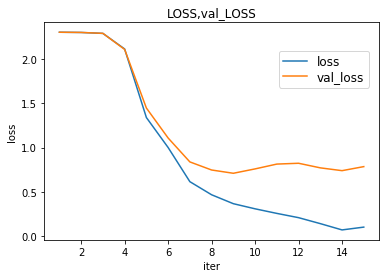

In [23]:
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [24]:
y_pred,y_pred_index  = clf.predict(X_val)
print("学習結果" + str(metrics.accuracy_score(np.argmax(y_val, axis = 1), y_pred_index)))

学習結果0.8079124579124579


In [25]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train_1.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train_1.shape)

(48000, 784)
(12000, 784)
(48000, 10)


In [26]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

[0.25740348522324197, 0.19890010139432032, 0.08156610631624861, 0.020993917330383693, 0.01574470360324756, 0.0020434358540482598, 0.0008985413230023174, 0.0014166209776131547, 0.0003816537356856713, 0.0006251875948896464, 0.0004889119964484057, 6.34775199097234e-05, 4.430943439943689e-05, 2.9026969142040544e-05, 1.5119000779179442e-05]
[0.25592991169379004, 0.15924097186595798, 0.12154213052921697, 0.11484436879446704, 0.10626386895663627, 0.10653604655818617, 0.10916243992957442, 0.10407219964798436, 0.11414594523293355, 0.11390345605301176, 0.10532995177602868, 0.10068949411729443, 0.09689410987294779, 0.09920793467389064, 0.09681124012061261]


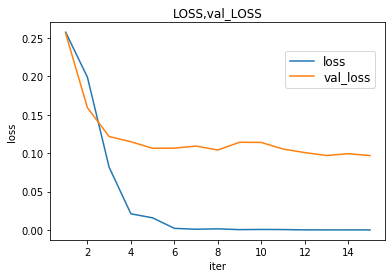

In [27]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [28]:
y_pred,y_pred_index  = clf.predict(X_val)
print("学習結果" + str(metrics.accuracy_score(np.argmax(y_val, axis = 1), y_pred_index)))

学習結果0.9779166666666667


In [29]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.99)
print(X_train_1.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train_1.shape)

(600, 784)
(59400, 784)
(600, 10)


In [30]:
# 初期化方法変更(ザビエル)

In [31]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,num_iter = 15,lr = 0.01, verbose = True):
        self.verbose = verbose
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.alpha = 0.001
        self.rec_loss = [] 
        self.rec_val_loss = []         
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        #最適化手法のインスタンス化
        optimizer = SGD(self.lr)
        initializer1 = Initializer_Xa(self.n_features)
        initializer2 = Initializer_Xa(self.n_nodes1)
        initializer3 = Initializer_Xa(self.n_nodes2)
        #層の数、各層の特徴数（インプット＆アウトプット）、初期値設定、最適化手法、活性化関数の種類を設定
        self.FC1 = FC(self.n_features, self.n_nodes1, initializer1, optimizer)
        self.activation1 = tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer2, optimizer)
        self.activation2 = tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer3, optimizer)
        self.activation3 = softmax()

        #ミニバッチ２０で学習
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
            for mini_X_train, mini_y_train in get_mini_batch:
        # フォワードプロパゲーション
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.Z3 = Z3
        # バックプロパゲーション
                dA3 = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
            self.loss_entropy(mini_y_train)
            #フィット後のB、Wを抜き出す
            self.B1 = self.FC1.B
            self.B2 = self.FC2.B
            self.B3 = self.FC3.B
            
            self.W1 = self.FC1.W
            self.W2 = self.FC2.W
            self.W3 = self.FC3.W
            self.val_loss_entropy()
                
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.Z3.shape[0]*(y_train_batch*(np.log(self.Z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

In [32]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

[2.301463980829183, 2.2994601777659116, 2.2913819366862023, 2.227762253117329, 1.5345967045028894, 1.0967754545437363, 0.7551543681735592, 0.5431374526717153, 0.44163524782848285, 0.38046579854658413, 0.3190298656089002, 0.25404517792281955, 0.21653451623435585, 0.1838529120520377, 0.17481123253827227]
[2.301452778458543, 2.2988915684061704, 2.2854989325745207, 1.9773341096774308, 1.451402759880878, 1.0910108146777457, 0.9392361387824004, 0.8456730986399714, 0.8267739198222858, 0.8285423490519948, 0.8467108588694485, 0.8784436204342785, 0.8924454089617898, 0.8920761114186395, 0.9511460284454746]


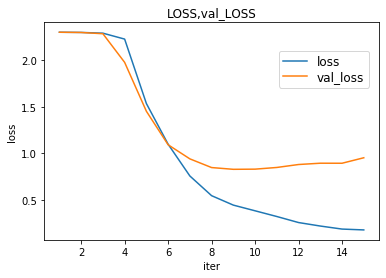

In [33]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [34]:
# 初期化方法変更(フー)

In [35]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,num_iter = 15,lr = 0.01, verbose = True):
        self.verbose = verbose
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.alpha = 0.001
        self.rec_loss = [] 
        self.rec_val_loss = []         
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        #最適化手法のインスタンス化
        optimizer = SGD(self.lr)
        initializer1 = Initializer_He(self.n_features)
        initializer2 = Initializer_He(self.n_nodes1)
        initializer3 = Initializer_He(self.n_nodes2)
        #層の数、各層の特徴数（インプット＆アウトプット）、初期値設定、最適化手法、活性化関数の種類を設定
        self.FC1 = FC(self.n_features, self.n_nodes1, initializer1, optimizer)
        self.activation1 = tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer2, optimizer)
        self.activation2 = tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer3, optimizer)
        self.activation3 = softmax()

        #ミニバッチ２０で学習
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
            for mini_X_train, mini_y_train in get_mini_batch:
        # フォワードプロパゲーション
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.Z3 = Z3
        # バックプロパゲーション
                dA3 = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
            self.loss_entropy(mini_y_train)
            #フィット後のB、Wを抜き出す
            self.B1 = self.FC1.B
            self.B2 = self.FC2.B
            self.B3 = self.FC3.B
            
            self.W1 = self.FC1.W
            self.W2 = self.FC2.W
            self.W3 = self.FC3.W
            self.val_loss_entropy()
                
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.Z3.shape[0]*(y_train_batch*(np.log(self.Z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = np.tanh(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = np.tanh(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

In [36]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

[2.30216201394188, 2.300588107435069, 2.2944931886421376, 2.211690886137229, 1.6004023977659185, 1.1725633483713929, 0.7963963702890141, 0.5626797887887799, 0.4532384152096368, 0.3806792616695792, 0.3289472184086247, 0.2760249938220933, 0.22933213531560936, 0.20835665435347794, 0.152462097413132]
[2.3015363723603697, 2.299203733242859, 2.288085863924507, 2.0613623000313446, 1.4662928765627028, 1.1042269078481468, 0.9386508757832147, 0.8518196891958792, 0.833394984181929, 0.8502572244539374, 0.8645582851152697, 0.9229972237172354, 0.9102900703460286, 0.9306533643945967, 0.9309420623612036]


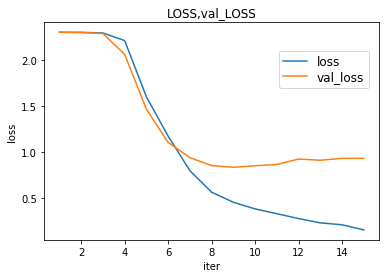

In [37]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [39]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,num_iter = 15,lr = 0.01, verbose = True):
        self.verbose = verbose
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.alpha = 0.001
        self.rec_loss = [] 
        self.rec_val_loss = []         
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        #最適化手法のインスタンス化
        optimizer = SGD(self.lr)
        initializer1 = Initializer_He(self.n_features)
        initializer2 = Initializer_He(self.n_nodes1)
        initializer3 = Initializer_He(self.n_nodes2)
        #層の数、各層の特徴数（インプット＆アウトプット）、初期値設定、最適化手法、活性化関数の種類を設定
        self.FC1 = FC(self.n_features, self.n_nodes1, initializer1, optimizer)
        self.activation1 = tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer2, optimizer)
        self.activation2 = tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer3, optimizer)
        self.activation3 = softmax()

        #ミニバッチ２０で学習
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
            for mini_X_train, mini_y_train in get_mini_batch:
        # フォワードプロパゲーション
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.Z3 = Z3
        # バックプロパゲーション
                dA3 = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
            self.loss_entropy(mini_y_train)
            #フィット後のB、Wを抜き出す
            self.B1 = self.FC1.B
            self.B2 = self.FC2.B
            self.B3 = self.FC3.B
            
            self.W1 = self.FC1.W
            self.W2 = self.FC2.W
            self.W3 = self.FC3.W
            self.val_loss_entropy()

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.Z3.shape[0]*(y_train_batch*(np.log(self.Z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = self.activation1.forward(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = self.activation2.forward(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = self.activation1.forward(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = self.activation2.forward(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

In [40]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

[2.30216201394188, 2.300588107435069, 2.2944931886421376, 2.211690886137229, 1.6004023977659185, 1.1725633483713929, 0.7963963702890141, 0.5626797887887799, 0.4532384152096368, 0.3806792616695792, 0.3289472184086247, 0.2760249938220933, 0.22933213531560936, 0.20835665435347794, 0.152462097413132]
[2.3015363723603697, 2.299203733242859, 2.288085863924507, 2.0613623000313446, 1.4662928765627028, 1.1042269078481468, 0.9386508757832147, 0.8518196891958792, 0.833394984181929, 0.8502572244539374, 0.8645582851152697, 0.9229972237172354, 0.9102900703460286, 0.9306533643945967, 0.9309420623612036]


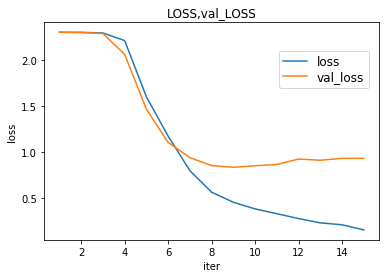

In [41]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [42]:
y_pred,y_pred_index  = clf.predict(X_val)
print("学習結果" + str(metrics.accuracy_score(np.argmax(y_val, axis = 1), y_pred_index)))

学習結果0.7628114478114478


In [44]:
# 初期化方法変更(フー、活性化関数RELU)

In [45]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,num_iter = 15,lr = 0.01, verbose = True):
        self.verbose = verbose
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.alpha = 0.01
        self.rec_loss = [] 
        self.rec_val_loss = []         
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        #最適化手法のインスタンス化
        optimizer = SGD(self.lr)
        initializer1 = Initializer_He(self.n_features)
        initializer2 = Initializer_He(self.n_nodes1)
        initializer3 = Initializer_He(self.n_nodes2)
        #層の数、各層の特徴数（インプット＆アウトプット）、初期値設定、最適化手法、活性化関数の種類を設定
        self.FC1 = FC(self.n_features, self.n_nodes1, initializer1, optimizer)
        self.activation1 = sc_relu()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer2, optimizer)
        self.activation2 = sc_relu()
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer3, optimizer)
        self.activation3 = softmax()

        #ミニバッチ２０で学習
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
            for mini_X_train, mini_y_train in get_mini_batch:
        # フォワードプロパゲーション
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.Z3 = Z3
        # バックプロパゲーション
                dA3 = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
            self.loss_entropy(mini_y_train)
            #フィット後のB、Wを抜き出す
            self.B1 = self.FC1.B
            self.B2 = self.FC2.B
            self.B3 = self.FC3.B
#             print(self.B1.shape)
#             print(self.B2.shape)
#             print(self.B3.shape)
            
            self.W1 = self.FC1.W
            self.W2 = self.FC2.W
            self.W3 = self.FC3.W
            self.val_loss_entropy()

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.Z3.shape[0]*(y_train_batch*(np.log(self.Z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = self.activation1.forward(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = self.activation2.forward(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = self.activation1.forward(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = self.activation2.forward(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

In [46]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

[2.302615043196852, 2.302282705043797, 2.301645807880057, 2.299909401043118, 2.2919552372648946, 2.216882489416712, 2.1990604867441754, 1.4515825525248518, 0.9273211399698623, 0.7470975854727504, 0.6154551090200064, 0.4156212567958096, 0.37201943954171274, 0.32218795108697096, 0.2919798905900685]
[2.3022981763284847, 2.3018799880208003, 2.3010133504754458, 2.298533684764317, 2.286850828716222, 2.136196073304509, 2.099158033223404, 1.8236957856418703, 1.1177053050065238, 0.9511401645128629, 0.846339976200058, 0.8618489520739098, 0.8789025835333312, 0.8781152408806966, 0.8103958090422098]


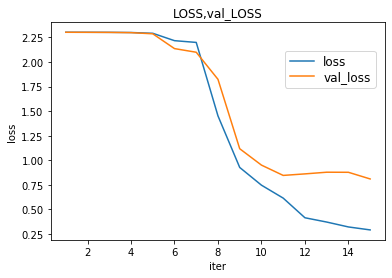

In [47]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [48]:
y_pred,y_pred_index  = clf.predict(X_val)
print("学習結果" + str(metrics.accuracy_score(np.argmax(y_val, axis = 1), y_pred_index)))

学習結果0.7731818181818182


# AdaGrad(ユニーク)

In [76]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.99)
print(X_train_1.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train_1.shape)

(600, 784)
(59400, 784)
(600, 10)


In [88]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,num_iter = 15,lr = 0.01, verbose = True):
        self.verbose = verbose
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.alpha = 0.01
        self.rec_loss = [] 
        self.rec_val_loss = []         
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        #最適化手法のインスタンス化
        optimizer1 = AdaGrad(lr=0.01)
        optimizer2 = AdaGrad(lr=0.01)
        optimizer3 = AdaGrad(lr=0.01)
        initializer1 = Initializer_He(self.n_features)
        initializer2 = Initializer_He(self.n_nodes1)
        initializer3 = Initializer_He(self.n_nodes2)
        #層の数、各層の特徴数（インプット＆アウトプット）、初期値設定、最適化手法、活性化関数の種類を設定
        self.FC1 = FC(self.n_features, self.n_nodes1, initializer1, optimizer1)
        self.activation1 = sc_relu()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer2, optimizer2)
        self.activation2 = sc_relu()
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer3, optimizer3)
        self.activation3 = softmax()

        #ミニバッチ２０で学習
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
            for mini_X_train, mini_y_train in get_mini_batch:
        # フォワードプロパゲーション
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.Z3 = Z3
        # バックプロパゲーション
                dA3 = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
            self.loss_entropy(mini_y_train)
            #フィット後のB、Wを抜き出す
            self.B1 = self.FC1.B
            self.B2 = self.FC2.B
            self.B3 = self.FC3.B
#             print(self.B1)
#             print(self.B2)
#             print(self.B3)
            
            self.W1 = self.FC1.W
            self.W2 = self.FC2.W
            self.W3 = self.FC3.W
            self.val_loss_entropy()

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.Z3.shape[0]*(y_train_batch*(np.log(self.Z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = self.activation1.forward(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = self.activation2.forward(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = self.activation1.forward(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = self.activation2.forward(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

In [89]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

[2.30232200222178, 2.2971100065613697, 2.090407867119209, 1.5596856732380855, 1.0126987929204245, 0.8093790009600519, 0.705877042746662, 0.628409375615987, 0.5646793844074626, 0.5110476922061977, 0.46863140076209925, 0.4336849936043887, 0.4053210120596685, 0.3782815029728587, 0.3586343495220777]
[2.3015385402853163, 2.2926012839419734, 1.899637840776336, 1.5678352489368033, 1.090655262894483, 0.9346939348697237, 0.8622466501149348, 0.8225358693081527, 0.7967509471025793, 0.7788706010907327, 0.7659975270053621, 0.7552438932712173, 0.7453227467369143, 0.7419260869750932, 0.7369832710918539]


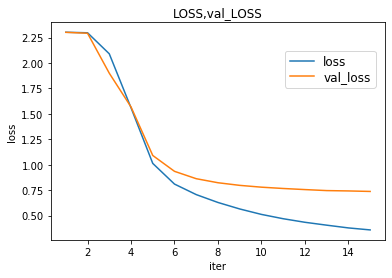

In [90]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [91]:
y_pred,y_pred_index  = clf.predict(X_val)
print("学習結果" + str(metrics.accuracy_score(np.argmax(y_val, axis = 1), y_pred_index)))

学習結果0.7894107744107745


In [92]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train_1.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train_1.shape)

(48000, 784)
(12000, 784)
(48000, 10)


In [93]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

[0.14295852969945003, 0.03589975118024271, 0.013531750999641497, 0.008206619772085469, 0.005477276239972271, 0.004103942474240613, 0.003037656430410743, 0.0022996115007086243, 0.0017620842218089802, 0.0013889338045064762, 0.001121234524025345, 0.0009354334285578423, 0.0007872375769949806, 0.0006604355151334712, 0.0005949237000820365]
[0.20723434924690126, 0.1420398682234692, 0.11685150689147392, 0.10393449668606657, 0.09623391083144218, 0.09121499932652374, 0.0876165382943081, 0.08527229710080705, 0.08335185886741654, 0.08158197126252208, 0.08019076520440435, 0.07913512334660008, 0.0784206701433463, 0.07782184796200682, 0.07743725092108805]


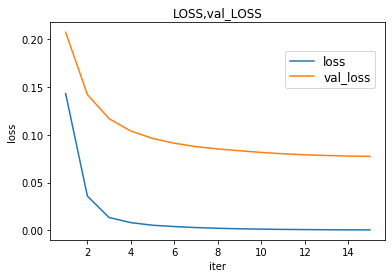

In [94]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [95]:
y_pred,y_pred_index  = clf.predict(X_val)
print("学習結果" + str(metrics.accuracy_score(np.argmax(y_val, axis = 1), y_pred_index)))

学習結果0.9789166666666667


# AdaGrad（平均）

In [99]:
class AdaGrad_mean:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr=0.001, h=0):
        self.lr = lr
        self.h_W = copy.deepcopy(h)
        self.h_B = copy.deepcopy(h)
    def update(self, layer):
        self.h_W += ((layer.dW/layer.dW.shape[0])*(layer.dW/layer.dW.shape[0])).mean()
#         print(self.h_W.shape)
        #self.h += ((layer.dW.mean(axis=1))*(layer.dW.mean(axis=1)))#.sum()
      
        layer.W = layer.W - self.lr/((self.h_W**0.5) + 0.001) *layer.dW/layer.dW.shape[0]
        #if self.h >= 0.2:
            #layer.W = layer.W - self.lr/(self.h**0.5)*layer.dW + 1e-7
#         else:
#             layer.W = layer.W - self.lr*layer.dW
        self.h_B += ((layer.dB/layer.dB.shape[0])*(layer.dB/layer.dB.shape[0])).mean()
#         print('dB',layer.dB.shape)#20
#         print('h_B',self.h_B.shape)#20
#         print('B',layer.B.shape)#10
#         print('dB.mean',layer.dB.mean(axis=0).shape)#shapeない
        layer.B = layer.B - self.lr/((self.h_B**0.5) + 0.001) *layer.dB.mean(axis=0)/layer.dB.shape[0]
        return layer

In [100]:
class ScratchDeepNeuralNetrowkClassifier():

    def __init__(self,num_iter = 15,lr = 0.01, verbose = True):
        self.verbose = verbose
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.alpha = 0.01
        self.rec_loss = [] 
        self.rec_val_loss = []         
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        #最適化手法のインスタンス化
        optimizer1 = AdaGrad_mean(lr=0.01)
        optimizer2 = AdaGrad_mean(lr=0.01)
        optimizer3 = AdaGrad_mean(lr=0.01)
        initializer1 = Initializer_He(self.n_features)
        initializer2 = Initializer_He(self.n_nodes1)
        initializer3 = Initializer_He(self.n_nodes2)
        #層の数、各層の特徴数（インプット＆アウトプット）、初期値設定、最適化手法、活性化関数の種類を設定
        self.FC1 = FC(self.n_features, self.n_nodes1, initializer1, optimizer1)
        self.activation1 = sc_relu()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer2, optimizer2)
        self.activation2 = sc_relu()
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer3, optimizer3)
        self.activation3 = softmax()

        #ミニバッチ２０で学習
        self.X = X
        self.y = y
        self.X_val = X_val
        self.y_val = y_val
        get_mini_batch = GetMiniBatch(self.X, self.y, batch_size=20)
        self.z_all = np.empty((0, 10),dtype=np.float)
        for i in range(self.num_iter):
            for mini_X_train, mini_y_train in get_mini_batch:
        # フォワードプロパゲーション
                A1 = self.FC1.forward(mini_X_train)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
                self.Z3 = Z3
        # バックプロパゲーション
                dA3 = self.activation3.backward(Z3, mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
            self.loss_entropy(mini_y_train)
            #フィット後のB、Wを抜き出す
            self.B1 = self.FC1.B
            self.B2 = self.FC2.B
            self.B3 = self.FC3.B
#             print(self.B1)
#             print(self.B2)
#             print(self.B3)
            
            self.W1 = self.FC1.W
            self.W2 = self.FC2.W
            self.W3 = self.FC3.W
            self.val_loss_entropy()

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def loss_entropy(self,y_train_batch):
        self.loss = -1/self.Z3.shape[0]*(y_train_batch*(np.log(self.Z3))).sum()  
        self.rec_loss.append(self.loss)
        
    def val_loss_entropy(self):
        self.a1 = self.X_val@self.W1 + self.B1
        self.z1 = self.activation1.forward(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = self.activation2.forward(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)        
        self.val_loss = -1/self.z3.shape[0]*(self.y_val*(np.log(self.z3))).sum()  
        self.rec_val_loss.append(self.val_loss)
        
    def predict(self, X_test):
        z_all = np.empty((0, 10),dtype=np.float)
#         print(z_all.shape)
        self.a1 = X_test@self.W1 + self.B1
        self.z1 = self.activation1.forward(self.a1)
        self.a2 = self.z1@self.W2 + self.B2
        self.z2 = self.activation2.forward(self.a2)
        self.a3 = self.z2@self.W3 + self.B3
        self.z3 = self.activation3.forward(self.a3)
        z_all = np.concatenate([z_all,self.z3])
        z_all_index = np.argmax(z_all, axis=1)
        
        pass
        return z_all, z_all_index

In [101]:
clf = ScratchDeepNeuralNetrowkClassifier()
clf.fit(X_train_1, y_train_1, X_val, y_val)

[0.13559616391596271, 0.03617705371682011, 0.01721347261627223, 0.011105684424015203, 0.007751651860004382, 0.005548446920747473, 0.00443253529033176, 0.003339847005588409, 0.00265686574270586, 0.0021234462996999404, 0.0016860197933477594, 0.0013906616576015206, 0.001130501148834525, 0.0009593536413660995, 0.0008248714101708147]
[0.22774272077268734, 0.16028409045049502, 0.133450295343423, 0.11850189643762297, 0.10901802434647093, 0.10319494658145632, 0.09933860596768088, 0.09643239946771164, 0.09396473800499335, 0.09199158207442275, 0.09048615119691046, 0.0892378561099464, 0.08831138631315863, 0.0875083847571535, 0.08698410032944108]


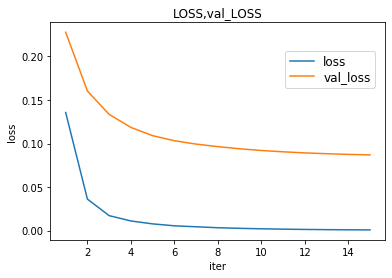

In [102]:
print(clf.rec_loss)
print(clf.rec_val_loss)
plt.title('LOSS,val_LOSS')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), clf.rec_loss)
plt.plot(range(1,16), clf.rec_val_loss)
legend_info = ('loss', 'val_loss')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [103]:
y_pred,y_pred_index  = clf.predict(X_val)
print("学習結果" + str(metrics.accuracy_score(np.argmax(y_val, axis = 1), y_pred_index)))

学習結果0.9745833333333334


In [105]:
loss_ori = np.array([0.14295852969945003, 0.03589975118024271, 0.013531750999641497, 0.008206619772085469, 0.005477276239972271, 0.004103942474240613, 0.003037656430410743, 0.0022996115007086243, 0.0017620842218089802, 0.0013889338045064762, 0.001121234524025345, 0.0009354334285578423, 0.0007872375769949806, 0.0006604355151334712, 0.0005949237000820365])
val_loss_ori = np.array([0.20723434924690126, 0.1420398682234692, 0.11685150689147392, 0.10393449668606657, 0.09623391083144218, 0.09121499932652374, 0.0876165382943081, 0.08527229710080705, 0.08335185886741654, 0.08158197126252208, 0.08019076520440435, 0.07913512334660008, 0.0784206701433463, 0.07782184796200682, 0.07743725092108805])

In [106]:
loss_mean = np.array([0.13559616391596271, 0.03617705371682011, 0.01721347261627223, 0.011105684424015203, 0.007751651860004382, 0.005548446920747473, 0.00443253529033176, 0.003339847005588409, 0.00265686574270586, 0.0021234462996999404, 0.0016860197933477594, 0.0013906616576015206, 0.001130501148834525, 0.0009593536413660995, 0.0008248714101708147])
val_loss_mean = np.array([0.22774272077268734, 0.16028409045049502, 0.133450295343423, 0.11850189643762297, 0.10901802434647093, 0.10319494658145632, 0.09933860596768088, 0.09643239946771164, 0.09396473800499335, 0.09199158207442275, 0.09048615119691046, 0.0892378561099464, 0.08831138631315863, 0.0875083847571535, 0.08698410032944108])

In [107]:
loss_def = loss_ori - loss_mean
val_loss_def = val_loss_ori - val_loss_mean

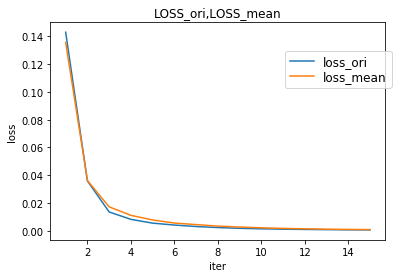

In [108]:
plt.title('LOSS_ori,LOSS_mean')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), loss_ori)
plt.plot(range(1,16), loss_mean)
legend_info = ('loss_ori', 'loss_mean')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

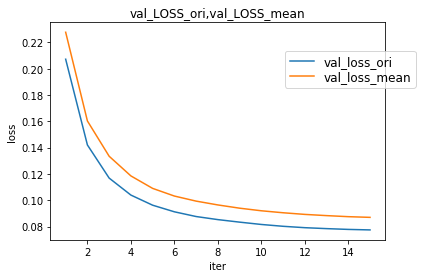

In [109]:
plt.title('val_LOSS_ori,val_LOSS_mean')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), val_loss_ori)
plt.plot(range(1,16), val_loss_mean)
legend_info = ('val_loss_ori', 'val_loss_mean')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

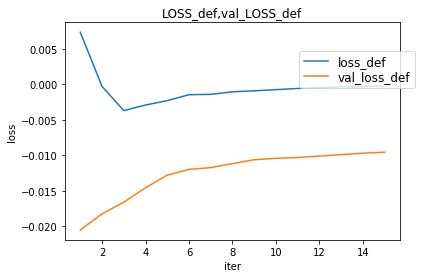

In [110]:
plt.title('LOSS_def,val_LOSS_def')
plt.xlabel('iter')
plt.ylabel('loss')

plt.plot(range(1,16), loss_def)
plt.plot(range(1,16), val_loss_def)
legend_info = ('loss_def', 'val_loss_def')
plt.legend(legend_info, loc=(0.7, 0.7), labelspacing=0.1, fontsize='large')
plt.show()

In [111]:
print(loss_def)
print(val_loss_def)

[ 0.00736237 -0.0002773  -0.00368172 -0.00289906 -0.00227438 -0.0014445
 -0.00139488 -0.00104024 -0.00089478 -0.00073451 -0.00056479 -0.00045523
 -0.00034326 -0.00029892 -0.00022995]
[-0.02050837 -0.01824422 -0.01659879 -0.0145674  -0.01278411 -0.01197995
 -0.01172207 -0.0111601  -0.01061288 -0.01040961 -0.01029539 -0.01010273
 -0.00989072 -0.00968654 -0.00954685]
